# Expansion Hunter: Results

In [102]:
# prep data
%matplotlib inline

list_of_results = ["Beijing-391_c100.json",                  "Beijing-like-1104_c200.json",
"Beijing-391_c150.json",                  "Beijing-like-1104_c250.json",
"Beijing-391_c150_PCR-free.json",         "Beijing-like-1104_c50.json",
"Beijing-391_c200.json",                  "Beijing-like-35049_c100.json",
"Beijing-391_c250.json",                  "Beijing-like-35049_c150.json",
"Beijing-391_c50.json",                   "Beijing-like-35049_c150_PCR-free.json",
"Beijing-like-1104_c100.json",            "Beijing-like-35049_c200.json",
"Beijing-like-1104_c150.json",            "Beijing-like-35049_c250.json",
"Beijing-like-1104_c150_PCR-free.json",   "Beijing-like-35049_c50.json"]

#    "A9s008" NOT INCLUDED

list_of_kelowna_results = ["10s165","A9s272","A9s314","10s177","A8s358","A9s089","A8s221","10s379",
"A9s005","A7s291","A6s116","A6s239","A6s426","A6s283","A6s158","A7s317","A6s320","A6s218","A5s120","10s255",
"12s074","A7s146","10s342","A8s182"]




list_of_templates = ["154","424","577","580","802","960","1664","1955","2059",
                     "2165","2347","2401","2461","2531","2687","2996","3007",
                     "3171","3192","3690","4052","4156","4348","2163b"]




# Indeces of copy numbers correspond to those in list_of_templates

true_391 =   [2,2.5,3.5,2.5,1,3,3,4.5,2,4,1.7,1.7,2,5,1.5,7,1.5,3,4,3,8,2.7,2.7,9]
true_1104 =  [2,2.5,3.5,2.5,1,3,3,4.5,2,4,1.7,1.7,2,5,1.5,7,1.5,3,4,3,1,2.7,2.7,9]
true_35049 = [2,2.5,3.5,2.5,1.5,3,3,4.5,2,4,2,1.5,2,5,1.5,7,1.5,3,4,3,1,3,3,8]


true_10s165=[2,4,4,2,3,4,3,4,2,3,4,4,2,5,1,5,3,3,3,3,7,3,2,2]
true_A9s008=[2,4,4,2,3,4,3,4,2,3,4,4,2,5,1,5,3,3,3,3,7,3,2,2]
true_A9s272=[2,4,4,2,3,4,3,4,2,3,4,4,2,5,1,5,3,3,3,3,7,3,2,2]
true_A9s314=[2,4,4,2,3,4,3,4,2,3,4,4,2,5,1,5,3,3,3,3,7,3,2,2]
true_10s177=[2,4,4,2,3,4,3,4,2,3,4,4,2,5,1,5,3,3,3,3,7,3,2,2]
true_A8s358=[2,4,4,3,3,4,3,1,1,4,4,2,2,5,1,5,3,3,3,3,5,2,2,4]
true_A9s089=[2,4,4,3,3,4,3,1,1,4,4,2,2,5,1,5,3,3,3,3,5,2,2,4]
true_A8s221=[2,4,4,3,3,4,3,1,1,4,4,2,2,5,1,5,3,3,3,3,5,2,2,4]
true_10s379=[2,4,4,3,3,4,3,1,1,4,4,2,2,5,1,5,3,3,3,3,5,2,2,4]
true_A9s005=[2,4,4,3,3,4,3,1,1,4,4,2,2,5,1,5,3,3,3,3,5,2,2,4]
true_A7s291=[2,2,4,2,3,3,3,5,2,4,4,4,2,5,1,6,3,3,5,3,8,2,3,5]
true_A6s116=[2,2,4,2,3,3,3,5,2,4,4,4,2,5,1,6,3,3,5,3,8,2,3,5]
true_A6s239=[2,2,4,2,3,3,3,5,2,4,4,4,2,5,1,6,3,3,5,3,8,2,3,5]
true_A6s426=[2,2,4,2,3,3,3,5,2,4,4,4,2,5,1,6,3,3,5,3,8,2,3,5]
true_A6s283=[2,2,4,2,3,3,3,5,2,4,4,4,2,5,1,6,3,3,5,3,8,2,3,5]
true_A6s158=[2,3,4,2,1,8,2,3,2,4,4,4,2,5,1,1,3,3,2,3,8,3,2,2]
true_A7s317=[2,3,4,2,1,8,2,3,2,4,4,4,2,5,1,1,3,3,2,3,8,3,2,2]
true_A6s320=[2,3,4,2,1,8,2,3,2,4,4,4,2,5,1,1,3,3,2,3,8,3,2,2]
true_A6s218=[2,3,4,2,1,8,2,3,2,4,4,4,2,5,1,1,3,3,2,3,8,3,2,2]
true_A5s120=[2,3,4,2,1,8,2,3,2,4,4,4,2,5,1,1,3,3,2,3,8,3,2,2]
true_10s255=[2,5,2,2,3,5,4,4,2,4,4,2,2,5,1,7,3,3,5,3,8,4,3,2]
true_12s074=[2,5,2,2,3,5,4,4,2,4,4,2,2,5,1,7,3,3,5,3,8,4,3,2]
true_A7s146=[2,5,2,2,3,5,4,4,2,4,4,2,2,5,1,7,3,3,5,3,8,4,3,2]
true_10s342=[2,5,2,2,3,5,4,4,2,4,4,2,2,5,1,7,3,3,5,3,8,4,3,2]
true_A8s182=[2,5,2,2,3,5,4,4,2,4,4,2,2,5,1,7,3,3,5,3,8,4,3,2]




## Fake data 

In [51]:
import json
import pandas as pd

df = pd.DataFrame(columns=["genome", "template","read_length","predicted_copy_number"])

for file in list_of_results:
    
    #load file
    json_file = open("/Users/ritavityaz/PycharmProjects/PythonPRINCE/results/" + file)
    json_str = json_file.read()
    json_data = json.loads(json_str)
    
    
    #assign correct genome
    if "391" in file:
        genome = "Beijing-391"
    if "1104" in file:
        genome = "Beijing-like-1104"
    if "35049" in file:
        genome = "Beijing-like-35049"
    
       
    #assign correct read length
    if "c150.json" in file:
        read_length = "150"
    if "c150_PCR-free" in file:
        read_length = "150_PCR-free"
    if "c200" in file:
        read_length = "200"
    if "c250" in file:
        read_length = "250"
    if "c50" in file:
        read_length = "50"
    if "c100" in file:
        read_length = "100"
        
# Put all the data in a Pandas dataframe        
    for i, template in enumerate(list_of_templates):
        if template in json_data:
              
            #assign correct true copy number
            if "391" in file:
                acp = true_391[i]
            if "1104" in file:
                acp = true_1104[i]
            if "35049" in file:
                acp = true_35049[i]


            df = df.append({
             "genome": genome,
             "template":  template,
             "read_length": read_length,
             "predicted_copy_number":json_data[template]["Genotype"][-1],
             "actual_copy_number": acp,
             "difference":abs(int(json_data[template]["Genotype"][-1])-acp)
              }, ignore_index=True)

        
df


        
        
# #         print(template)
#         print(json_data["154"]["Genotype"])
# #         print(json_data["154"]["GenotypeCi"])




,genome,template,read_length,predicted_copy_number,actual_copy_number,difference
0,Beijing-391,154,100,3,2.0,1.0
1,Beijing-391,424,100,3,2.5,0.5
2,Beijing-391,577,100,5,3.5,1.5
3,Beijing-391,802,100,1,1.0,0.0
4,Beijing-391,960,100,4,3.0,1.0
5,Beijing-391,1955,100,8,4.5,3.5
6,Beijing-391,2059,100,3,2.0,1.0
7,Beijing-391,2165,100,7,9.0,2.0
8,Beijing-391,2347,100,2,4.0,2.0
9,Beijing-391,2401,100,2,1.7,0.3


## Fake data V2

In [131]:
#UPDATED
import json
import pandas as pd

df_fake2 = pd.DataFrame(columns=["genome", "template","read_length","predicted_copy_number"])

for file in list_of_results:
    
    #load file
    json_file = open("/Users/ritavityaz/Desktop/results_upd2/" + file)
    json_str = json_file.read()
    json_data = json.loads(json_str)
    
    
    #assign correct genome
    if "391" in file:
        genome = "Beijing-391"
    if "1104" in file:
        genome = "Beijing-like-1104"
    if "35049" in file:
        genome = "Beijing-like-35049"
    
       
    #assign correct read length
    if "c150.json" in file:
        read_length = "150"
    if "c150_PCR-free" in file:
        read_length = "150_PCR-free"
    if "c200" in file:
        read_length = "200"
    if "c250" in file:
        read_length = "250"
    if "c50" in file:
        read_length = "50"
    if "c100" in file:
        read_length = "100"
        
# Put all the data in a Pandas dataframe        
    for i, template in enumerate(list_of_templates):
        if template in json_data:
              
            #assign correct true copy number
            if "391" in file:
                acp = true_391[i]
            if "1104" in file:
                acp = true_1104[i]
            if "35049" in file:
                acp = true_35049[i]
                
            #Find largest interval and find it's median
            CI = (json_data[template]["GenotypeCi"]).split("/")
            predicted_from_CI_1 = CI[0]
            
            CI_1_split = predicted_from_CI_1.split("-")
            CI_1_L = int(CI_1_split[0])
            CI_1_R = int(CI_1_split[1])
            range_1 = CI_1_R - CI_1_L 
            
            predicted_from_CI_2 = CI[1]
            CI_2_split = predicted_from_CI_2.split("-")
            CI_2_L = int(CI_2_split[0])
            CI_2_R = int(CI_2_split[1])
            range_2 = CI_2_R -CI_2_L 
            
            
            if range_1 > range_2:
               pred_Ci = CI_1_L + range_1/2
            
            if range_1 < range_2:
               pred_Ci = CI_2_L + range_2/2


            df_fake2 = df_fake2.append({
             "genome": genome,
             "template":  template,
             "read_length": read_length,
             "predicted_copy_number":json_data[template]["Genotype"][-1],
             "predicted_copy_number_range":pred_Ci,
             "actual_copy_number": acp,
             "difference":abs(int(json_data[template]["Genotype"][-1])-acp),
             "diiference_range":abs(int(json_data[template]["Genotype"][-1])-pred_Ci)
             }, ignore_index=True)
            
            
            df_fake2["abs_diff"] = (df_fake2['actual_copy_number'] - df_fake2["predicted_copy_number_range"]).abs()
            df_fake2["sq_diff"] = (df_fake2['actual_copy_number'] - df_fake2["predicted_copy_number_range"])**2


        
df_fake2

from sklearn.metrics import mean_squared_error,mean_absolute_error

mae_f= df_fake2.groupby("template").apply(
    lambda x: mean_absolute_error(x.actual_copy_number, x.predicted_copy_number_range))

from sklearn.metrics import mean_squared_error

mrse_f = df_fake2.groupby("template").apply(
    lambda x: mean_squared_error(x.actual_copy_number, x.predicted_copy_number_range) ** .5)





temp = pd.DataFrame({'templates':mae_f.index, 'mae_expHunter':mae_f.values, 'mrse_expHunter':mrse_f.values })

temp
temp.to_csv("fake_expHunter.csv")




        
        
# #         print(template)
#         print(json_data["154"]["Genotype"])
# #         print(json_data["154"]["GenotypeCi"])




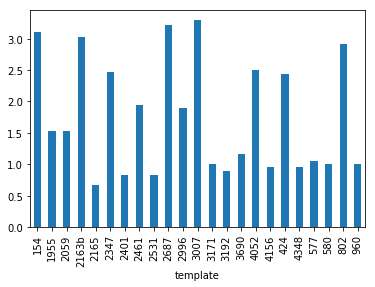

In [118]:
%matplotlib inline
from sklearn.metrics import mean_squared_error,mean_absolute_error

df_fake2.groupby("template").apply(
    lambda x: mean_absolute_error(x.actual_copy_number, x.predicted_copy_number_range)).plot(kind='bar')

    

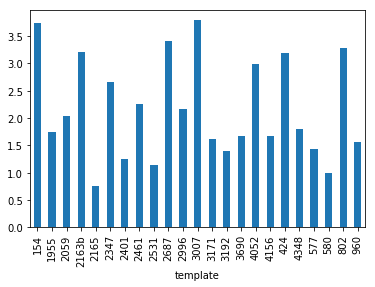

In [121]:
%matplotlib inline
from sklearn.metrics import mean_squared_error

df_fake2.groupby("template").apply(
    lambda x: mean_squared_error(x.actual_copy_number, x.predicted_copy_number_range) ** .5).plot(kind='bar')


In [119]:
#total counts
counts = pd.value_counts(df_fake2["diiference_range"].values, sort=True)
pd.value_counts(df_fake2["diiference_range"].values, sort=True)


0.5    90
1.5    59
3.5    41
1.0    38
2.5    28
4.5    22
0.0    22
2.0    22
3.0    15
5.5    11
4.0    11
5.0     5
7.5     3
8.5     3
6.5     3
7.0     2
dtype: int64

In [120]:
total = 0
for count in counts:
    total +=count
# total = total - counts[0]
print(counts[0])
print(total)

print("Percent perfect answers " + str((counts[0]/total)*100))
print("Percent answers off by less than(or equal to) one " + str(((counts[0] + counts[1] + counts[2])/total)*100))
print("Percent answers off by less than(or equal to) two " + str(((counts[0] + counts[1] + counts[2]+ counts[3]+ counts[4])/total)*100))

abs_dif_sum = df_fake2["abs_diff"].sum()
MAE = abs_dif_sum/total
print("MAE: " + str(MAE))

sq_dif_sum = df_fake2["sq_diff"].sum()
RMSE = (sq_dif_sum/total)**(0.5)
print("RMSE: " + str(RMSE))
 


22
375
Percent perfect answers 5.86666666667
Percent answers off by less than(or equal to) one 21.8666666667
Percent answers off by less than(or equal to) two 28.8
MAE: 1.8016
RMSE: 2.39865517878


## Kelowna results

In [129]:
#UPDATED
%matplotlib inline
import json
import pandas as pd

df_kelowna = pd.DataFrame(columns=["genome","template","predicted_copy_number"])

for file in list_of_kelowna_results:
    
    #load file
    json_file = open("/Users/ritavityaz/Desktop/kelowna_results_fixed/" + file + ".json")
    json_str = json_file.read()
    json_data = json.loads(json_str)
         
# Put all the data in a Pandas dataframe        
    for i, template in enumerate(list_of_templates):
        if template in json_data:
              
            #assign correct true copy number
            acp = (eval("true_" + file))[i]
            
            
            #Find largest interval and find it's median
            CI = (json_data[template]["GenotypeCi"]).split("/")
            predicted_from_CI_1 = CI[0]
            
            CI_1_split = predicted_from_CI_1.split("-")
            CI_1_L = int(CI_1_split[0])
            CI_1_R = int(CI_1_split[1])
            range_1 = CI_1_R - CI_1_L 
            
            predicted_from_CI_2 = CI[1]
            CI_2_split = predicted_from_CI_2.split("-")
            CI_2_L = int(CI_2_split[0])
            CI_2_R = int(CI_2_split[1])
            range_2 = CI_2_R -CI_2_L 
            
            
            if range_1 > range_2:
               pred_Ci = CI_1_L + range_1/2
            
            if range_1 < range_2:
               pred_Ci = CI_2_L + range_2/2
                
            
            
        
#             print(CI)
#             print(predicted_from_CI_1)
#             print(predicted_from_CI_2)
#             print(CI_1_L)
#             print(CI_1_R)
#             print(range_1)
            
            
            

            df_kelowna = df_kelowna.append({
             "genome": file,
             "template":  template,
             "predicted_copy_number":json_data[template]["Genotype"][-1],
             "predicted_copy_number_range":pred_Ci,
             "actual_copy_number": acp,
             "difference":abs(int(json_data[template]["Genotype"][-1])-acp),
             "diiference_range":abs(int(json_data[template]["Genotype"][-1])-pred_Ci)  
              }, ignore_index=True)
            
            df_kelowna["abs_diff"] = (df_kelowna['actual_copy_number'] - df_kelowna["predicted_copy_number_range"]).abs()
            df_kelowna["sq_diff"] = (df_kelowna['actual_copy_number'] - df_kelowna["predicted_copy_number_range"])**2

        
# df

%matplotlib inline
from sklearn.metrics import mean_squared_error,mean_absolute_error

mae_k= df_kelowna.groupby("template").apply(
    lambda x: mean_absolute_error(x.actual_copy_number, x.predicted_copy_number_range))

from sklearn.metrics import mean_squared_error

mrse_k = df_kelowna.groupby("template").apply(
    lambda x: mean_squared_error(x.actual_copy_number, x.predicted_copy_number_range) ** .5)





temp = pd.DataFrame({'templates':mae_k.index, 'mae_expHunter':mae_k.values, 'mrse_expHunter':mrse_k.values })

temp
temp.to_csv("Kelowna_expHunter.csv")
# df_kelowna.groupby("template").apply(
#     lambda x: mean_absolute_error(x.actual_copy_number, x.predicted_copy_number_range)).plot(kind='bar')

        

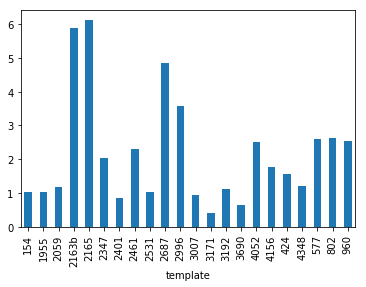

In [115]:
%matplotlib inline
from sklearn.metrics import mean_squared_error

df_kelowna.groupby("template").apply(
    lambda x: mean_squared_error(x.actual_copy_number, x.predicted_copy_number_range) ** .5).plot(kind='bar')


In [100]:
#total counts
counts = pd.value_counts(df["diiference_range"].values, sort=True)
pd.value_counts(df["diiference_range"].values, sort=True)


0.5     170
0.0      88
1.0      81
1.5      61
7.0      17
2.0      15
4.5      14
7.5      13
5.0      12
3.5      12
6.5      11
2.5       8
8.0       5
5.5       4
4.0       3
3.0       3
6.0       3
10.0      1
13.5      1
15.5      1
30.5      1
dtype: int64

In [101]:
total = 0
for count in counts:
    total +=count
# total = total - counts[0]
print(counts[0])
print(total)

print("Percent perfect answers " + str((counts[0]/total)*100))
print("Percent answers off by less than(or equal to) one " + str(((counts[0] + counts[1] + counts[2])/total)*100))
print("Percent answers off by less than(or equal to) two " + str(((counts[0] + counts[1] + counts[2]+ counts[3]+ counts[4])/total)*100))

abs_dif_sum = df["abs_diff"].sum()
MAE = abs_dif_sum/total
print("MAE: " + str(MAE))

sq_dif_sum = df["sq_diff"].sum()
RMSE = (sq_dif_sum/total)**(0.5)
print("RMSE: " + str(RMSE))
 


88
524
Percent perfect answers 16.7938931298
Percent answers off by less than(or equal to) one 35.1145038168
Percent answers off by less than(or equal to) two 36.2595419847
MAE: 1.61832061069
RMSE: 2.70072085373


# Beijing results

In [162]:
beijing_data = pd.read_csv('/Users/ritavityaz/Downloads/BeijingCopynumbers.csv')
problem = ["ERR551979","ERR552141","ERR552194","ERR552358","ERR552668","ERR552755"]

beijing_data = beijing_data[~beijing_data['genome'].isin(problem)]

beijing_data

,Mean Coverage,genome,154,580,960,1644,2059,2531,2687,2996,...,1955,2163b,2165,2347,2401,2461,3171,3690,4052,4156
0,72.8,ERR550643,2,2,3,3,2,5,1,7,...,4,7,4,4,4,2,3,3,8,1
1,57.5,ERR550658,2,2,3,3,2,5,1,5,...,5,6,4,4,4,2,3,3,8,2
2,73.4,ERR550670,2,2,1,3,2,5,1,7,...,4,6,4,4,4,2,3,3,9,2
3,98.9,ERR550724,2,2,3,3,2,5,1,5,...,5,6,4,4,4,2,3,3,8,2
4,57.4,ERR550738,2,2,3,3,2,5,1,7,...,5,6,4,4,4,2,3,3,7,2
5,72.5,ERR550739,2,2,3,3,2,5,1,7,...,5,2,4,2,4,2,3,3,8,2
6,67.2,ERR550779,2,2,3,3,2,5,1,5,...,5,6,2,4,4,2,3,3,8,2
7,83.8,ERR550782,2,2,3,3,2,5,1,5,...,5,6,4,4,4,2,3,3,8,2
8,84.5,ERR550887,2,2,3,3,2,5,1,5,...,5,6,4,4,4,2,3,3,8,2
9,267.1,ERR550910,2,2,3,3,2,5,1,7,...,5,5,4,4,4,2,3,3,8,2


In [161]:
%matplotlib inline
import json
import pandas as pd

df_beijing = pd.DataFrame(columns=["genome","template","predicted_copy_number"])

for index, file in beijing_data.iterrows():
    #load file
    json_file = open("/Users/ritavityaz/Desktop/beijing_results/" + file["genome"] + ".json")
    json_str = json_file.read()
    json_data = json.loads(json_str)
         
# Put all the data in a Pandas dataframe        
    for i, template in enumerate(list_of_templates):

        if template in json_data:
              
            #assign correct true copy number
            acp = file[template]
            
            #Find largest interval and find it's median
            CI = (json_data[template]["GenotypeCi"]).split("/")
            predicted_from_CI_1 = CI[0]
            
            CI_1_split = predicted_from_CI_1.split("-")
            CI_1_L = int(CI_1_split[0])
            CI_1_R = int(CI_1_split[1])
            range_1 = CI_1_R - CI_1_L 
            
            predicted_from_CI_2 = CI[1]
            CI_2_split = predicted_from_CI_2.split("-")
            CI_2_L = int(CI_2_split[0])
            CI_2_R = int(CI_2_split[1])
            range_2 = CI_2_R -CI_2_L 
            
            if range_1 > range_2:
               pred_Ci = CI_1_L + range_1/2
            
            if range_1 < range_2:
               pred_Ci = CI_2_L + range_2/2
                
            df_beijing = df_beijing.append({
             "genome": file["genome"],
             "template":  template,
             "predicted_copy_number":json_data[template]["Genotype"][-1],
             "predicted_copy_number_range":pred_Ci,
             "actual_copy_number": acp,
             "difference":abs(int(json_data[template]["Genotype"][-1])-acp),
             "diiference_range":abs(int(json_data[template]["Genotype"][-1])-pred_Ci)  
              }, ignore_index=True)
            
            
            df_beijing["abs_diff"] = (df_beijing['actual_copy_number'] - df_beijing["predicted_copy_number_range"]).abs()
            df_beijing["sq_diff"] = (df_beijing['actual_copy_number'] - df_beijing["predicted_copy_number_range"])**2

        
df_beijing

# %matplotlib inline
# from sklearn.metrics import mean_squared_error,mean_absolute_error

# mae_k= df_kelowna.groupby("template").apply(
#     lambda x: mean_absolute_error(x.actual_copy_number, x.predicted_copy_number_range))

# from sklearn.metrics import mean_squared_error

# mrse_k = df_kelowna.groupby("template").apply(
#     lambda x: mean_squared_error(x.actual_copy_number, x.predicted_copy_number_range) ** .5)





# temp = pd.DataFrame({'templates':mae_k.index, 'mae_expHunter':mae_k.values, 'mrse_expHunter':mrse_k.values })

# temp
# temp.to_csv("Kelowna_expHunter.csv")
# df_kelowna.groupby("template").apply(
#     lambda x: mean_absolute_error(x.actual_copy_number, x.predicted_copy_number_range)).plot(kind='bar')

        

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ritavityaz/Desktop/beijing_results/ERR551979.json'

In [143]:
%matplotlib inline
from sklearn.metrics import mean_squared_error

df_beijing.groupby("template").apply(
    lambda x: mean_squared_error(x.actual_copy_number, x.predicted_copy_number_range) ** .5).plot(kind='bar')


TypeError: Empty 'DataFrame': no numeric data to plot

CNVeM: Issues

http://genetics.cs.ucla.edu/cnvem/

ritas-MacBook-Pro:CNVem1.0 ritavityaz$ ./splitReads
./splitReads./splitReads
Segmentation fault: 11


CNVnator

https://github.com/abyzovlab/CNVnator

This is the one that is hard to set up. It Requires to install the ROOT package, but doesn't specify explicitly how to set the variable. On the ROOT website, and in the package documentation, several completely different methods are described, so I can't be certain that what I was doing is what I was expected to do. The documentation is not explicit about the installation overall. Many things were attempted, and none of them worked.

Summary: https://docs.google.com/spreadsheets/d/14CwRhsLzBuSUOoqah4sBYYMCTL0xKHmt6yXehmUm0iI/edit?usp=sharing